### Importing Packages and Load Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [48]:
data1 = pd.read_csv("./train.csv",usecols=['Age','Fare','Survived'])
data2 = pd.read_csv("./house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [49]:
data1.sample(4)

,Survived,Age,Fare
375,1,NaN,82.1708
103,0,33.0,8.6542
723,0,50.0,13.0000
880,1,25.0,26.0000


In [50]:
data2.sample(4)

,FireplaceQu,GarageQual,SalePrice
682,Gd,TA,173000
1365,NaN,TA,216000
236,NaN,TA,185500
359,TA,TA,280000


In [4]:
data1.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [51]:
data2.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Train Test Split

In [66]:
X1 = data1.drop('Survived', axis=1)
y1 = data1['Survived']

In [67]:
X2 = data2
y2 = data2['SalePrice']

In [68]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

### Random Sample Imputation (Numerical)

In [71]:
X1_train['Age_imputed'] = X1_train['Age']
X1_test['Age_imputed'] = X1_test['Age']

In [72]:
train_samples = X1_train['Age'].dropna().sample(X1_train['Age'].isnull().sum())
test_samples = X1_test['Age'].dropna().sample(X1_test['Age'].isnull().sum())

In [73]:
X1_train.loc[X1_train['Age_imputed'].isnull(), 'Age_imputed'] = train_samples.values
X1_test.loc[X1_test['Age_imputed'].isnull(), 'Age_imputed'] = test_samples.values

In [74]:
X1_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,41.0
493,71.0,49.5042,71.0
527,NaN,221.7792,24.0


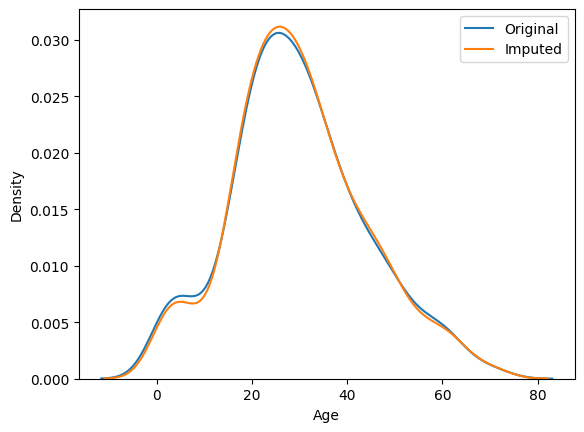

In [75]:
sns.kdeplot(X1_train['Age'], label='Original')
sns.kdeplot(X1_train['Age_imputed'], label='Imputed')
plt.legend()
plt.show()

In [76]:
print("Original Age variance: ", X1_train['Age'].var())
print("Imputed Age variance: ", X1_train['Age_imputed'].var())

Original Age variance:  204.34951339046142
Imputed Age variance:  198.86234600874698


In [77]:
X1_train[['Age','Fare','Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,50.054077
Age_imputed,204.349513,50.054077,198.862346


<Axes: >

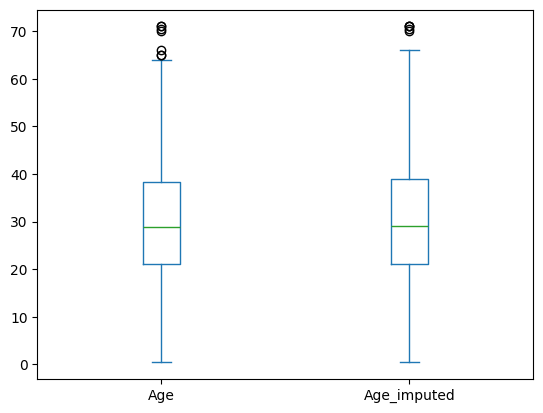

In [78]:
X1_train[['Age','Age_imputed']].plot(kind='box')

In [79]:
sampled_values = X1_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

### Random Sample Imputation (Categorical)

In [80]:
X2_train['GarageQual_imputed'] = X2_train['GarageQual']
X2_test['GarageQual_imputed'] = X2_test['GarageQual']

X2_train['FireplaceQu_imputed'] = X2_train['FireplaceQu']
X2_test['FireplaceQu_imputed'] = X2_test['FireplaceQu']

In [83]:
train_samples_garage_qual = X2_train['GarageQual'].dropna().sample(X2_train['GarageQual'].isnull().sum())
test_samples_garage_qual = X2_test['GarageQual'].dropna().sample(X2_test['GarageQual'].isnull().sum())

In [84]:
train_samples_fireplace_qu = X2_train['FireplaceQu'].dropna().sample(X2_train['FireplaceQu'].isnull().sum())
test_samples_fireplace_qu = X2_test['FireplaceQu'].dropna().sample(X2_test['FireplaceQu'].isnull().sum())

In [85]:
X2_train.loc[X2_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = train_samples_garage_qual.values
X2_test.loc[X2_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = test_samples_garage_qual.values

X2_train.loc[X2_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = train_samples_fireplace_qu.values
X2_test.loc[X2_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = test_samples_fireplace_qu.values

In [86]:
X2_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,Gd
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [88]:
temp = pd.concat([
    X2_train['GarageQual'].value_counts() / len(X2_train['GarageQual'].dropna()),
    X2_train['GarageQual_imputed'].value_counts() / len(X2_train)  
],axis=1)

temp.columns = ['Original','Imputed']
temp

,Original,Imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [89]:
temp = pd.concat([
    X2_train['FireplaceQu'].value_counts() / len(X2_train['FireplaceQu'].dropna()),
    X2_train['FireplaceQu_imputed'].value_counts() / len(X2_train)  
],axis=1)

temp.columns = ['Original','Imputed']
temp

,Original,Imputed
Gd,0.494272,0.489726
TA,0.412439,0.416952
Fa,0.040917,0.041096
Po,0.027823,0.028253
Ex,0.024550,0.023973


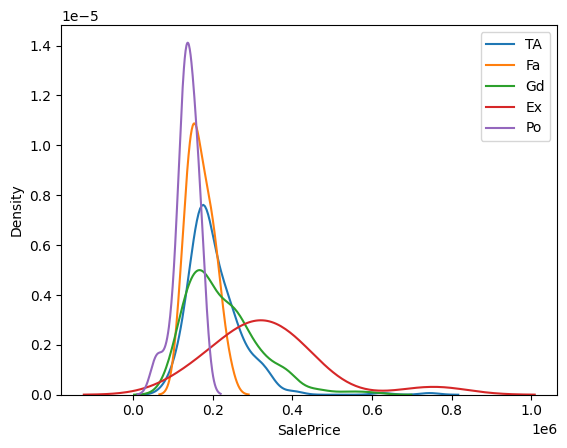

In [91]:
for cat in X2_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X2_train[X2_train['FireplaceQu'] == cat]['SalePrice'], label=cat)
plt.legend()
plt.show()

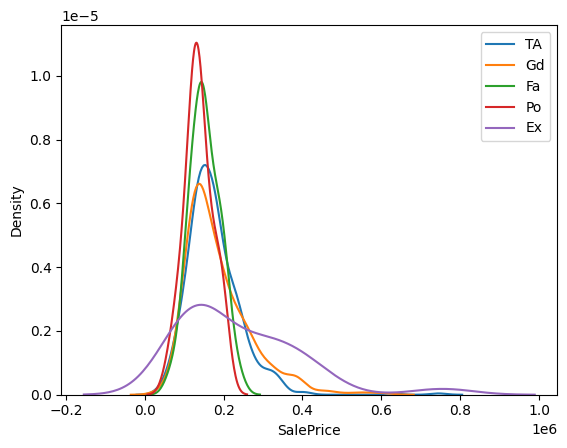

In [92]:
for cat in X2_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X2_train[X2_train['FireplaceQu_imputed'] == cat]['SalePrice'], label=cat)
plt.legend()
plt.show()